In [1]:
import pandas as pd
import seaborn as sns

Import da Base de dados

In [2]:
tips = pd.read_csv('./data/tips.csv', sep=',')
tips.head()


,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


C:\Users\barba\anaconda3\envs\tips-analysis\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


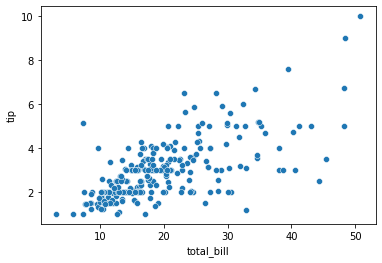

In [3]:
tip_value = sns.scatterplot('total_bill', 'tip', data = tips)

Análisando o Gráfico, o valor da Gorjeta aumenta conforme maior é o valor da conta

In [4]:
print("Total de registros:{}".format(tips.shape[0]))
print("Registros não nulos: {}".format(tips.count()))

Total de registros:244
Registros não nulos: total_bill    244
tip           244
dessert       244
day           244
time          244
size          244
dtype: int64


Criando campo de Porcentagem

In [5]:
tips['percentage'] = tips.tip / tips['total_bill']
tips.head()

,total_bill,tip,dessert,day,time,size,percentage
0,16.99,1.01,No,Sun,Dinner,2,0.059447
1,10.34,1.66,No,Sun,Dinner,3,0.160542
2,21.01,3.50,No,Sun,Dinner,3,0.166587
3,23.68,3.31,No,Sun,Dinner,2,0.139780
4,24.59,3.61,No,Sun,Dinner,4,0.146808


In [6]:
tips['percentage'] = tips.percentage.round(2)
tips.head()

,total_bill,tip,dessert,day,time,size,percentage
0,16.99,1.01,No,Sun,Dinner,2,0.06
1,10.34,1.66,No,Sun,Dinner,3,0.16
2,21.01,3.50,No,Sun,Dinner,3,0.17
3,23.68,3.31,No,Sun,Dinner,2,0.14
4,24.59,3.61,No,Sun,Dinner,4,0.15


Análise pela porcentagem

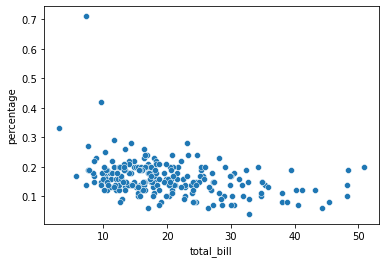

In [7]:
percentage = sns.scatterplot(x = tips.total_bill , y = tips.percentage, data = tips)

Análisando o Gráfico, o valor da Conta não é proporcional ao valor da Gorjeta


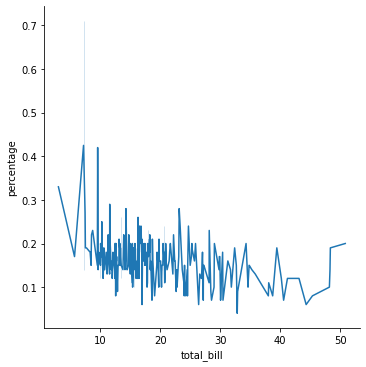

In [8]:
percentage_bill_line = sns.relplot(x = tips.total_bill , y = tips.percentage, data = tips, kind='line')

Análise da Progreção para validação

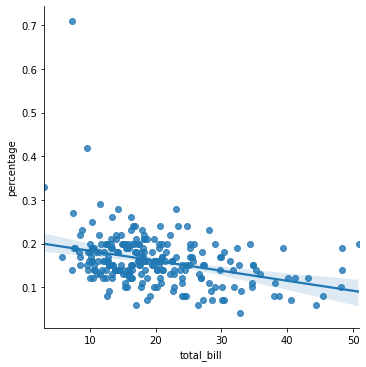

In [9]:
percentage_bill_progression = sns.lmplot(x = 'total_bill' , y = 'percentage', data = tips)

Análise 2 - Sobremesa

In [10]:
tips.head()

,total_bill,tip,dessert,day,time,size,percentage
0,16.99,1.01,No,Sun,Dinner,2,0.06
1,10.34,1.66,No,Sun,Dinner,3,0.16
2,21.01,3.50,No,Sun,Dinner,3,0.17
3,23.68,3.31,No,Sun,Dinner,2,0.14
4,24.59,3.61,No,Sun,Dinner,4,0.15


In [11]:
tips[tips.dessert == 'Yes'].describe()


,total_bill,tip,size,percentage
count,93.000000,93.000000,93.000000,93.000000
mean,20.756344,3.008710,2.408602,0.163226
std,9.832154,1.401468,0.810751,0.085060
min,3.070000,1.000000,1.000000,0.040000
25%,13.420000,2.000000,2.000000,0.110000
50%,17.920000,3.000000,2.000000,0.150000
75%,26.860000,3.680000,3.000000,0.200000
max,50.810000,10.000000,5.000000,0.710000


In [12]:
tips[tips.dessert == 'No'].describe()

,total_bill,tip,size,percentage
count,151.000000,151.000000,151.000000,151.000000
mean,19.188278,2.991854,2.668874,0.159536
std,8.255582,1.377190,1.017984,0.039889
min,7.250000,1.000000,1.000000,0.060000
25%,13.325000,2.000000,2.000000,0.140000
50%,17.590000,2.740000,2.000000,0.160000
75%,22.755000,3.505000,3.000000,0.185000
max,48.330000,9.000000,6.000000,0.290000


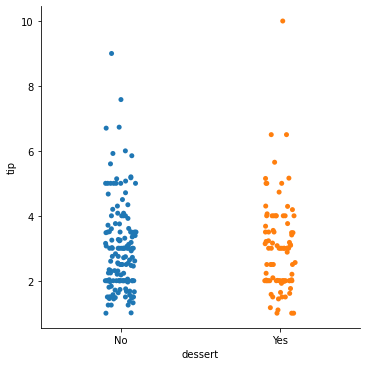

In [13]:
sns.catplot(x='dessert', y='tip', data = tips)

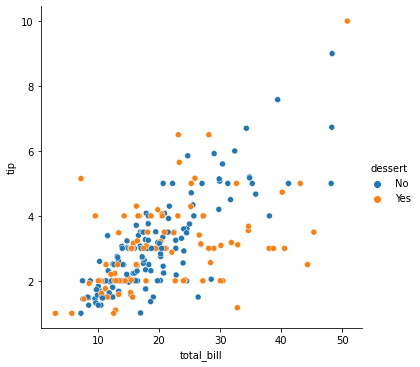

In [14]:
sns.relplot(x='total_bill', y='tip', hue= 'dessert', data=tips)

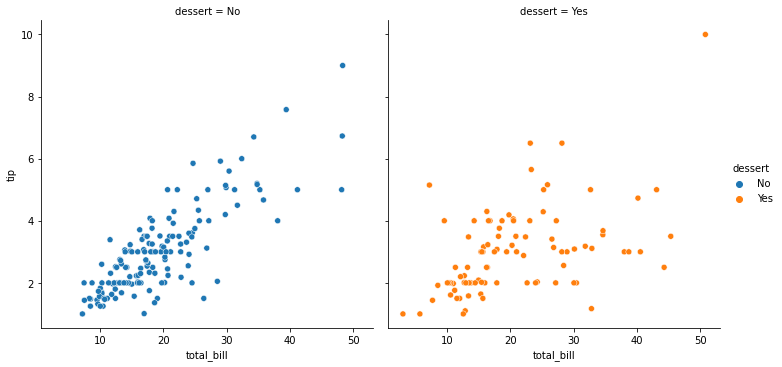

In [15]:
sns.relplot(x='total_bill', y='tip', hue= 'dessert', col='dessert', data=tips)

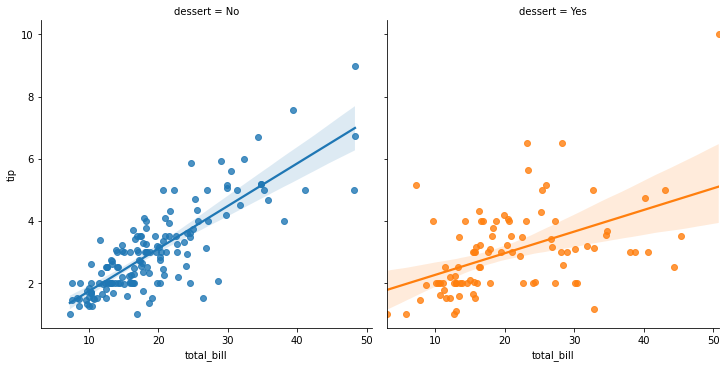

In [16]:
sns.lmplot(x='total_bill', y='tip', hue= 'dessert', col='dessert', data=tips)

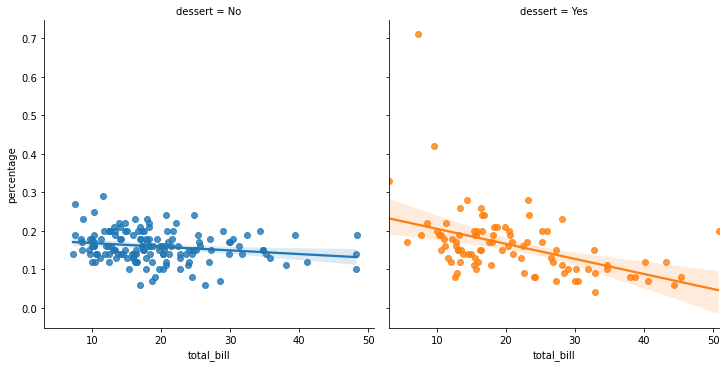

In [17]:
sns.lmplot(x='total_bill', y='percentage', hue= 'dessert', col='dessert', data=tips)

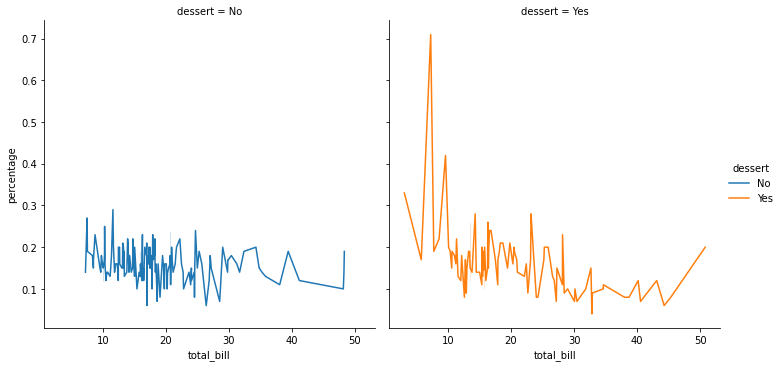

In [18]:
sns.relplot(x='total_bill', y='percentage', hue= 'dessert', col='dessert', data=tips, kind= 'line')

Visualmente, existe uma diferença no valor da gorjeta daqueles que pediram e não pediram sobremesa

**Teste de Hipótese**

**H<sup>null</sup>**

**A distribuição da Gorjeta é a mesma nos dois grupos**

**H<sup>alt</sup>**

**A distribuição da taxa da  Gorjeta não é a mesma nos dois grupos**

In [19]:
from scipy.stats import ranksums

In [20]:
dessert = tips.query("dessert == 'Yes'").percentage
no_dessert = tips.query("dessert == 'No'").percentage
no_dessert

0      0.06
1      0.16
2      0.17
3      0.14
4      0.15
       ... 
235    0.12
238    0.13
239    0.20
242    0.10
243    0.16
Name: percentage, Length: 151, dtype: float64

In [21]:
r = ranksums(dessert, no_dessert)
print("O valor do p-value é {}".format(r.pvalue))

O valor do p-value é 0.5266635660124415


**Hipótese aceita**

**H<sup>null</sup>**

**A distribuição da taxa da  Gorjeta é a mesma nos dois grupos**

***Análise 3 - Dia da Semana***

In [23]:
tips.day.unique()


array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

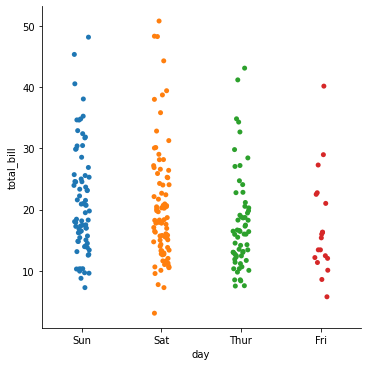

In [24]:
sns.catplot(x='day', y='total_bill', data=tips)

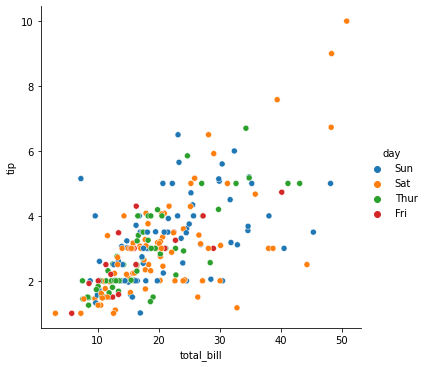

In [25]:
sns.relplot(x='total_bill', y='tip', hue='day', data=tips)

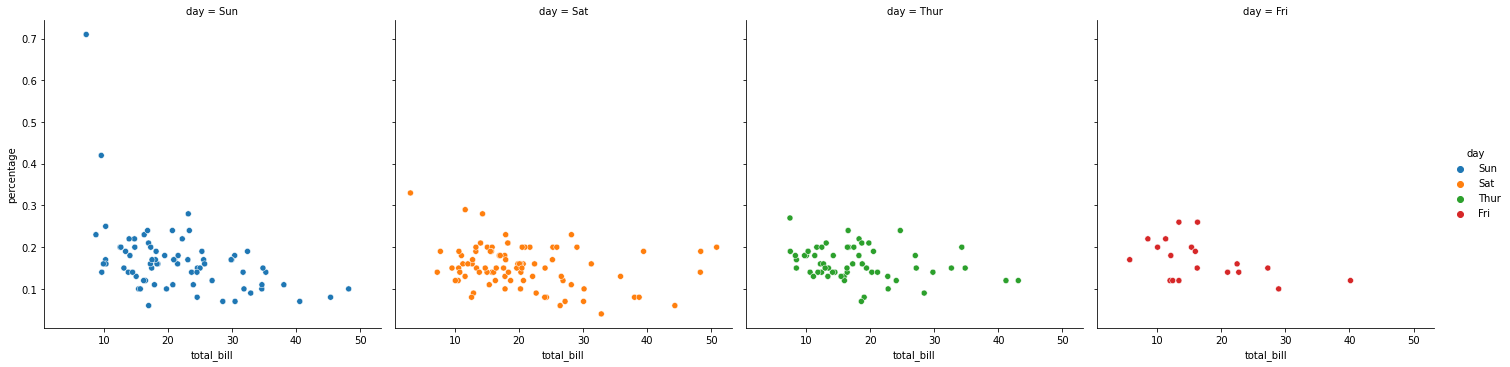

In [27]:
sns.relplot(x='total_bill', y='percentage',hue='day', col='day', data=tips)

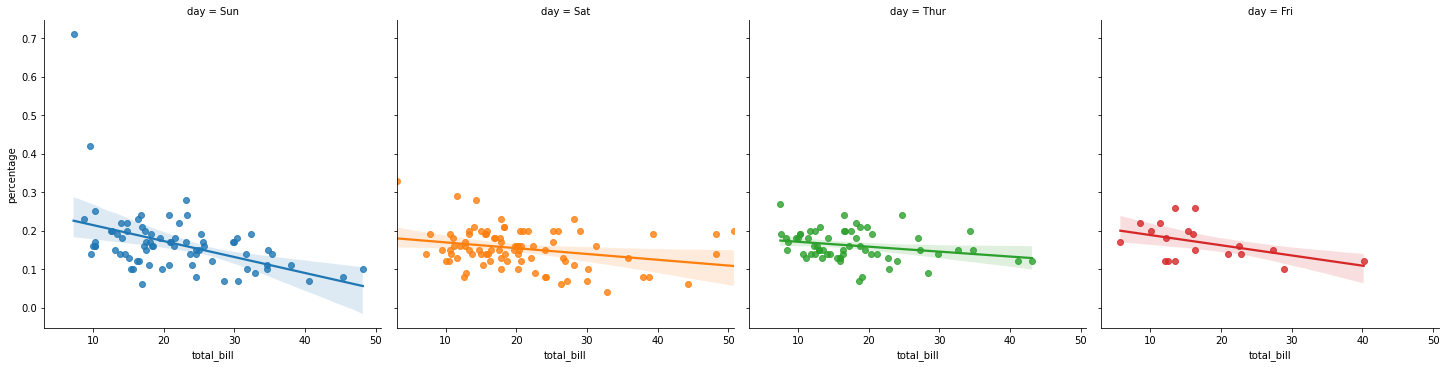

In [28]:
sns.lmplot(x='total_bill', y='percentage',hue='day', col='day', data=tips)

In [29]:
mean_general_tips = tips.tip.mean()
print("Média geral das Gorjetas: {}".format(mean_general_tips))

Média geral das Gorjetas: 2.9982786885245902


In [30]:
tips.groupby(['day']).mean()

,total_bill,tip,size,percentage
day,,,,
Fri,17.151579,2.734737,2.105263,0.169474
Sat,20.441379,2.993103,2.517241,0.153678
Sun,21.410000,3.255132,2.842105,0.166974
Thur,17.682742,2.771452,2.451613,0.161129


In [32]:
tips.groupby(['day']).mean()[['total_bill', 'tip', 'percentage']]

,total_bill,tip,percentage
day,,,
Fri,17.151579,2.734737,0.169474
Sat,20.441379,2.993103,0.153678
Sun,21.410000,3.255132,0.166974
Thur,17.682742,2.771452,0.161129


In [34]:
print("Frequência dos dias")
tips.day.value_counts()

Frequência dos dias


Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

***Teste de Hipótese***

**H<sup>null</sup>**

**A distribuição do valor da conta é igual no sábado e no domingo**

**H<sup>alt</sup>**

**A distribuição do valor da conta não é igual no sábado e no domingo**

In [37]:
sun_total_bill = tips.query("day == 'Sun'").total_bill
sat_total_bill = tips.query("day == 'Sat'").total_bill

In [39]:
r2 = ranksums(sun_total_bill, sat_total_bill)
print("O valor do p-value é {}".format(r2.pvalue))

O valor do p-value é 0.3576728477868443


**H<sup>null</sup>**

**A hipótese aceita foi a nulla, a distribuição do valor da conta é igual no sábado e no domingo**

In [40]:
tips.head()

,total_bill,tip,dessert,day,time,size,percentage
0,16.99,1.01,No,Sun,Dinner,2,0.06
1,10.34,1.66,No,Sun,Dinner,3,0.16
2,21.01,3.50,No,Sun,Dinner,3,0.17
3,23.68,3.31,No,Sun,Dinner,2,0.14
4,24.59,3.61,No,Sun,Dinner,4,0.15


***Análise 4 - Hora do dia***

In [41]:
tips.time.unique()

array(['Dinner', 'Lunch'], dtype=object)

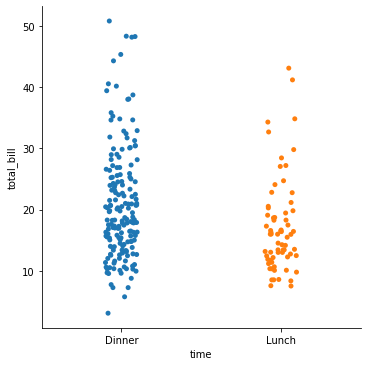

In [42]:
sns.catplot(x='time', y='total_bill', data= tips)

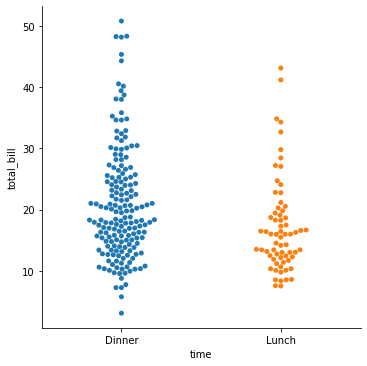

In [43]:
sns.catplot(x='time', y='total_bill',kind='swarm', data= tips)

<AxesSubplot:xlabel='time', ylabel='total_bill'>

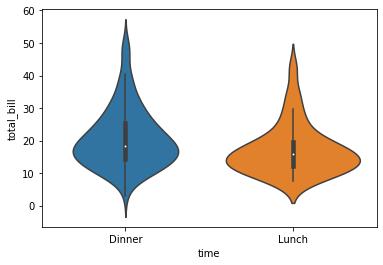

In [44]:
sns.violinplot(x='time', y='total_bill', data= tips)

<AxesSubplot:xlabel='time', ylabel='total_bill'>

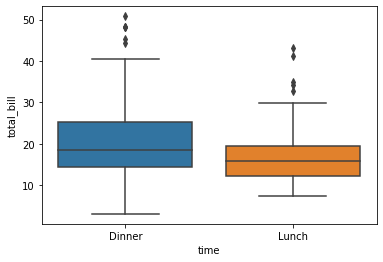

In [45]:
sns.boxplot(x='time', y='total_bill', data= tips)

In [47]:
lunch = tips.query("time == 'Lunch'").total_bill

C:\Users\barba\anaconda3\envs\tips-analysis\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_bill', ylabel='Density'>

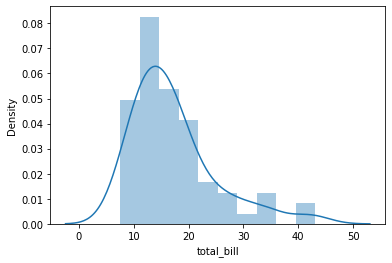

In [49]:
sns.distplot(lunch)

C:\Users\barba\anaconda3\envs\tips-analysis\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_bill'>

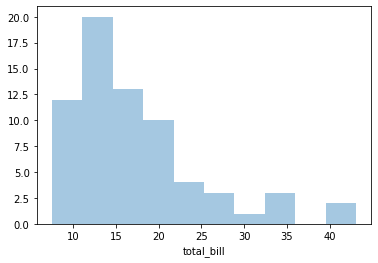

In [50]:
sns.distplot(lunch, kde=False)

In [51]:
dinner = tips.query("time == 'Dinner'").total_bill

C:\Users\barba\anaconda3\envs\tips-analysis\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_bill', ylabel='Density'>

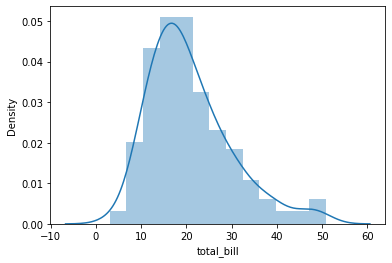

In [52]:
sns.distplot(dinner)

C:\Users\barba\anaconda3\envs\tips-analysis\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_bill'>

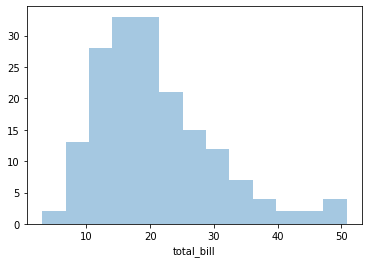

In [53]:
sns.distplot(dinner, kde=False)

In [55]:
tips.groupby(['time']).mean()[['total_bill', 'tip', 'percentage']]

,total_bill,tip,percentage
time,,,
Dinner,20.797159,3.102670,0.159773
Lunch,17.168676,2.728088,0.163971


***Teste de Hipótese***

**H<sup>null</sup>**

**A distribuição do valor da conta é igual no jantar e no almoço**

**H<sup>alt</sup>**

**A distribuição do valor da conta não é igual no jantar e no almoço**

In [58]:
r3 = ranksums(dinner,lunch)
print('O valor do pvalue: {}'.format(r3.pvalue))

O valor do pvalue: 0.0011791039723641672


**H<sup>alt</sup>**

**A distribuição do valor da conta não é igual no jantar e no almoço**


***Teste de Hipótese 2***

**H<sup>null</sup>**

**A distribuição da taxa da gorjeta é igual no jantar e no almoço**

**H<sup>alt</sup>**

**A distribuição da taxa da gorjeta não é igual no jantar e no almoço**

In [59]:
percentage_lunch = tips.query("time == 'Lunch'").percentage
percentage_dinner = tips.query("time == 'Dinner'").percentage

In [61]:
r4=ranksums(percentage_lunch, percentage_dinner)
print("O valor do pvalue: {}".format(r4.pvalue))

O valor do pvalue: 0.2602493995587126


**H<sup>null</sup>**

**A distribuição da taxa da gorjeta é igual no jantar e no almoço**